# Social Networks and Text Analysis - Lab 2: Centratility of Networks

_Lecturer:_ Dr. Riccardo Di Clemente r.di-clemente@exeter.ac.uk
\
_Teaching assistant:_ Ben Dennes b.g.dennes@exeter.ac.uk

## 1. Intro: What is centrality?

_Centrality_ is a term to describe importance of individual nodes in a graph.
There has been a lot of research carried out in this topic for network analysis to answer the question,
"Which are the most important nodes (vertices) in a graph?"
Here is the list of different metrics to find it, which I would like to discuss:

* [Degree Centrality](#Degree-Centrality)
* [Eigenvector Centrality](#Eigenvector-Centrality)
* [Katz Centrality](#Katz-Centrality)
* [Closeness Centrality](#Closeness-Centrality)
* [Betweenness Centrality](#Betweenness-Centrality)




In [2]:
# !pip install networkx==2.6.3 #---> use older version of networkx: adjacency matrix function broken in newer versions
# !pip install scipy>=1.8
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Some parts of this notebook are inspired by a notebook from Can Güney Aksakalli

#Importing the necessary libraries for this lab:
#------------------------------------------------

import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import matplotlib.colors as mcolors #---> Library for setting colors of the plots
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
import pandas as pd #---> Library for analysing dataframes
import seaborn as sns #---> Library forcreating plots
import random #---> Library for generating random numbers/distributions
from pylab import rcParams #---> Library for set the attributes of the figures


#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2. Network layouts with the Zachary's Karate Club:

Zachary’s Karate Club graph is defined as the example graph `G`.

It is basically a social network of members of an university karate club,
where undirected edges connects people who interact outside the club.

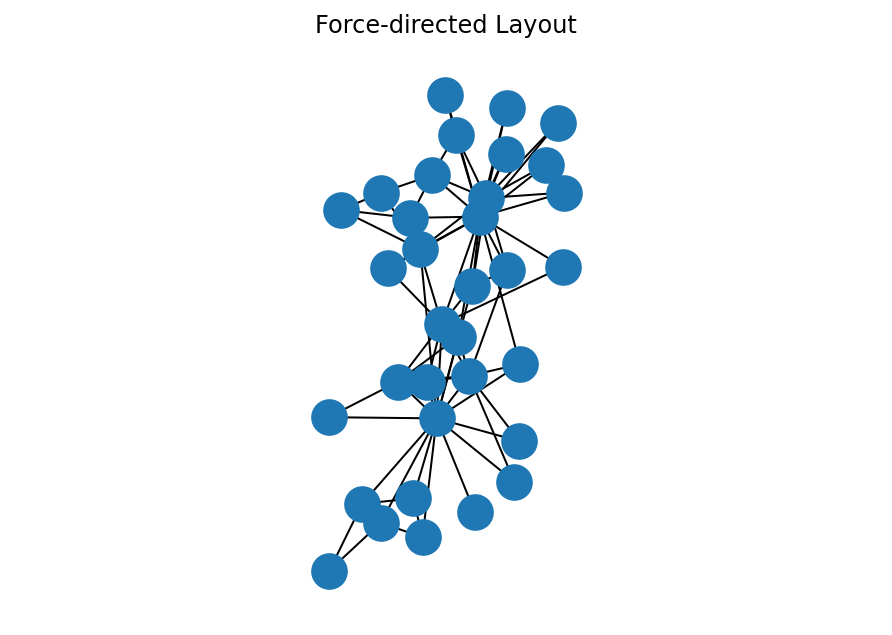

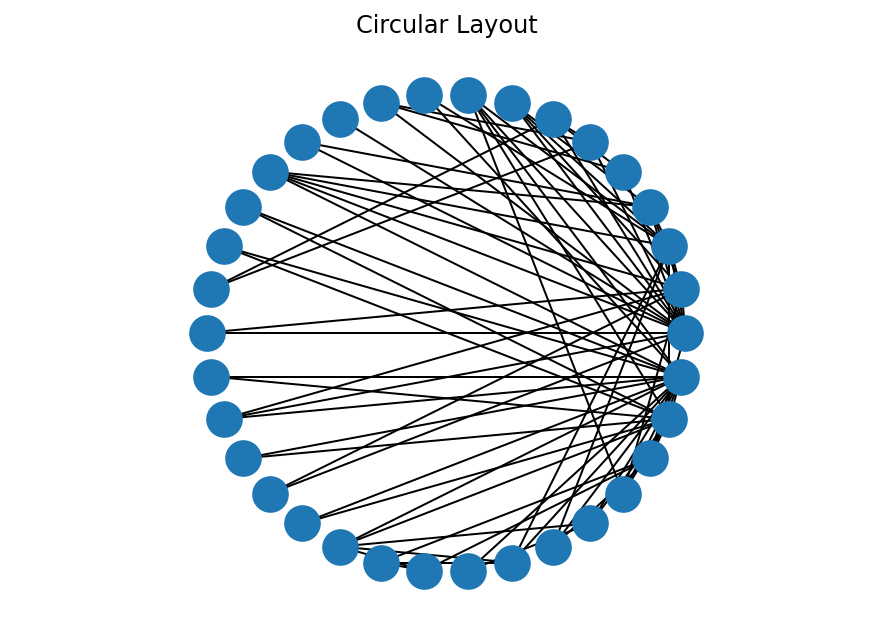

In [4]:
G = nx.karate_club_graph() #<-- Load the Karate club network

#Plotting the network with the first Layout:
pos = nx.spring_layout(G) #<-- use a force-directed ('spring') layout
nx.draw(G, pos=pos)
plt.title('Force-directed Layout')
plt.axis('equal') # make the plot square
plt.show()

#Plotting the network with the second Layout:
pos = nx.circular_layout(G) #<-- Set the circular layout
nx.draw(G, pos=pos)
plt.title('Circular Layout')
plt.axis('equal') # make the plot square
plt.show()

## 4. Saving and loading edge files

Defining the Directed graph I will be using for the example

In [5]:
DiG = nx.DiGraph() #<-- Create an empty directed graph
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)]) #<-- Add the edges from a list of tuples

dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]} #<-- manually set the x and y positions of each node 

save a list of weighted edges

In [6]:
#Add weights to the previous edges and save the edges as a '.edges' file:
for e in DiG.edges():
    DiG[e[0]][e[1]]['weight'] = float(random.uniform(0, 1))
nx.write_edgelist(DiG, "network.edges")


load a file of weighted edges

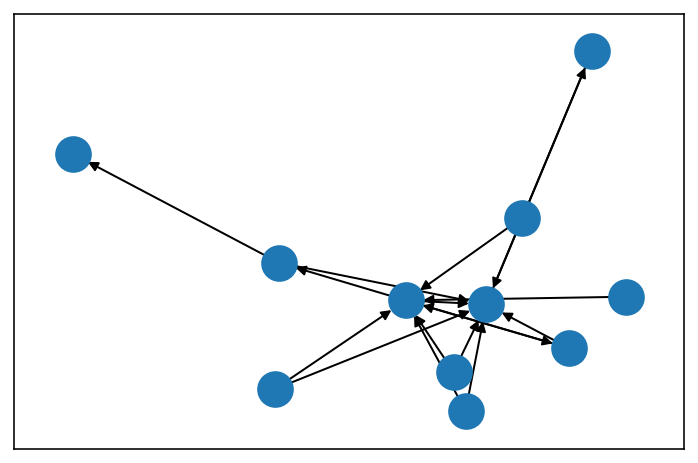

In [7]:
# Read the edges file
fh = open("network.edges", 'r')
Gx = nx.read_edgelist(fh, nodetype=int, create_using=nx.DiGraph()) #<-- Read the network file, specify the type of network ('create_using') 
                                                                
pos = nx.spring_layout(Gx) #<-- Set the layout of the read network
nx.draw_networkx_edges(Gx, pos) #<-- Plot the edges of the network
nx.draw_networkx_nodes(Gx, pos) #<-- Plot the nodes of the network

In [8]:
#View the edges starting in node 2 and their wieght:
Gx[2]

AtlasView({3: {'weight': 0.15886301976495476}})

## 5. Network layout and parameters - further examples

In [9]:
G = nx.karate_club_graph() #<-- Use the karate club network

We will use other two different layout to draw the network G:

In [10]:
pos = nx.shell_layout(G) 
pos2 = nx.random_layout(G) 

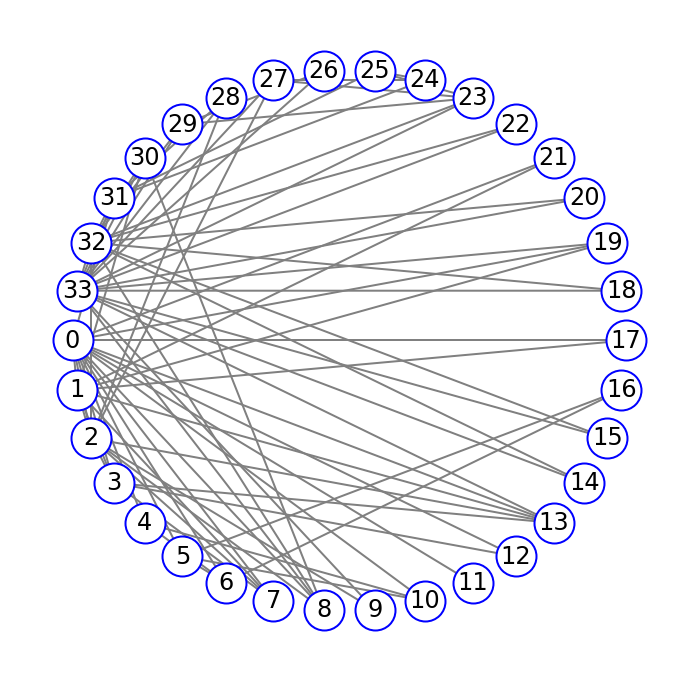

In [11]:
plt.figure(figsize=(6,6))

nodes = nx.draw_networkx_nodes(G, pos, node_size=400, node_color='w', edgecolors='b') #<-- plot the nodes (and make a matplotlib object: 'nodes')

node_labels = {i:i for i in G.nodes()} # make dictionary of labels: value (label) is the same as node id (key) for each node
labels = nx.draw_networkx_labels(G, pos, node_labels, font_size=12) #<-- plot the labels for nodes (positions are same as nodes)

edges = nx.draw_networkx_edges(G, pos, edge_color='grey') #<-- plot the edges

plt.axis('off') # don't plot the outline of the axis
plt.savefig('shell_zachary_nolabel.svg') # save the plot as a vector image
plt.show()

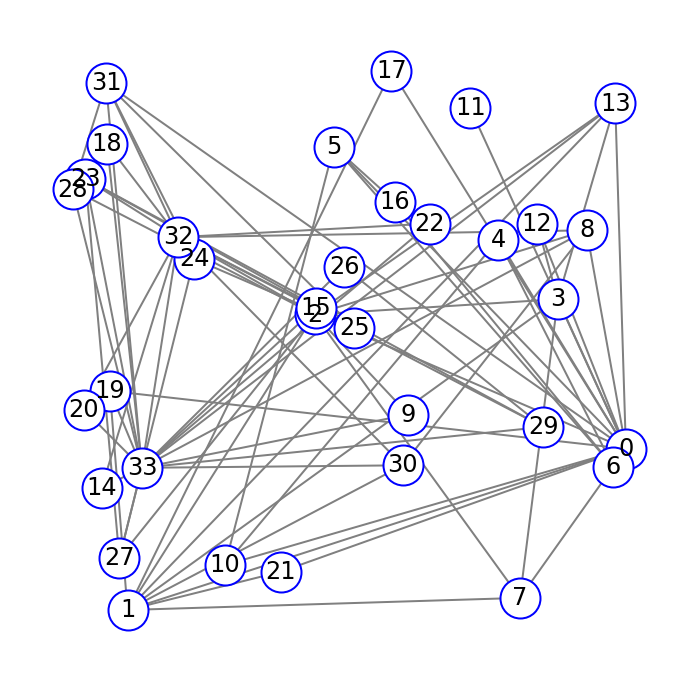

In [12]:
plt.figure(figsize=(6,6))

nodes = nx.draw_networkx_nodes(G, pos2, node_size=400, node_color='White', edgecolors='b')

edges = nx.draw_networkx_edges(G, pos2, edge_color = 'grey') #<-- Set the edges plot
nx.draw_networkx_labels(G, pos2, node_labels, font_size=12)  #<-- we can use the same node labels as before - the node ids are the same

plt.axis('off')
plt.savefig('shell_zachary_label.svg')
plt.show()

## 6. Plot network nodes depending on a weight

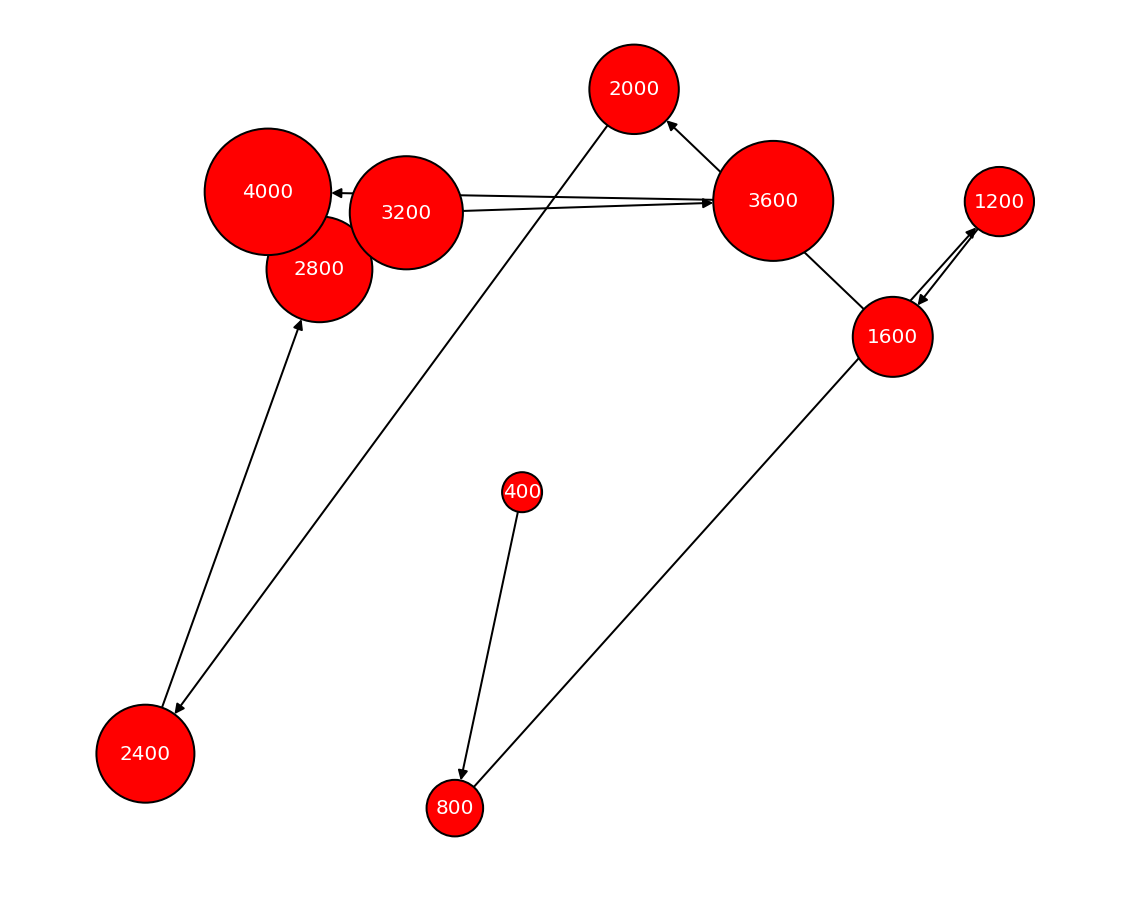

In [13]:
# Create a list of 10 nodes numbered 1 to 10
nodes = range(1,11)

node_sizes = [n*400 for n in nodes] # make a list of sizes for the nodes
                                    # the node size is proportional to its id (its number)
node_labels = {n : n*400 for n in nodes} # make a dictionary of labels: a node's label is its size

# Connect each node to its successor:
edges = [ (i+1, i+2) for i in range(len(nodes)-1) ] #<-- set the edges

# Create the graph and draw it with the node labels
g = nx.DiGraph() # make an empty directed graph
g.add_nodes_from(nodes)
g.add_edges_from(edges)

plt.figure(figsize=(10,8))
plt.axis('off')
plt.axis('equal')

pos=nx.random_layout(g) # define random layout for nodes
nx.draw_networkx(g, pos, node_color='r', node_size=node_sizes, edgecolors='k',
                 labels=node_labels, with_labels=True, font_size=10, font_color='w')
plt.show()

## 7. Defining custom plotting functions

It is often convenient to define functions to carry out specific tasks, combining together lines of code that we would otherwise have to write out each time.

In this case, we define a simple method to draw a graph and illustrate the centrality of each node through its colour

In [14]:
def draw(G, pos, measures, measure_name):
    '''This function draw a network based on a specific metric in the color and a specified layout
    
    Attributes:
    G: The networkx object
    pos: x and y coordinates of each node
    measures: dict with the node id as key and measure of centrality as value
    measure_name: string variable with the name of the plotted network '''
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=400,
                                   cmap=plt.cm.plasma, # colour map to use for the nodes
                                   node_color=list(measures.values()), # values to be mapped to a colour
                                   nodelist=list(measures.keys())) # specific nodes to plot - this can be a subset of the nodes in the graph object G
    
    # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1, base=10)) #<-- Setting the normalisation scale - this determines how each value is mapped to a colour value
    
    labels = nx.draw_networkx_labels(G, pos, font_color='white')
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name) # make the title the name of the measure used
    cbar = plt.colorbar(nodes) # create a colourbar based on the nodes

    cbar.set_label('Weight', rotation=270, labelpad=12) #--> Set the label of the colourbar and rotate it
    
    plt.axis('off') #<-- Remove the border of the network plot
    plt.show()

## 5. Degree Centrality

As covered in lectures, one intuitive way of considering centrality (or, 'importance') is the degree. In many contexts, the number of connections a node has will correspond to the importance of that node. 

For example, the number of friends a person has in a community may correspond to their popularity or 'importance'.

In [15]:
# define a network and node positions
G = nx.karate_club_graph() #<-- Use the karate club network
pos = nx.spring_layout(G)

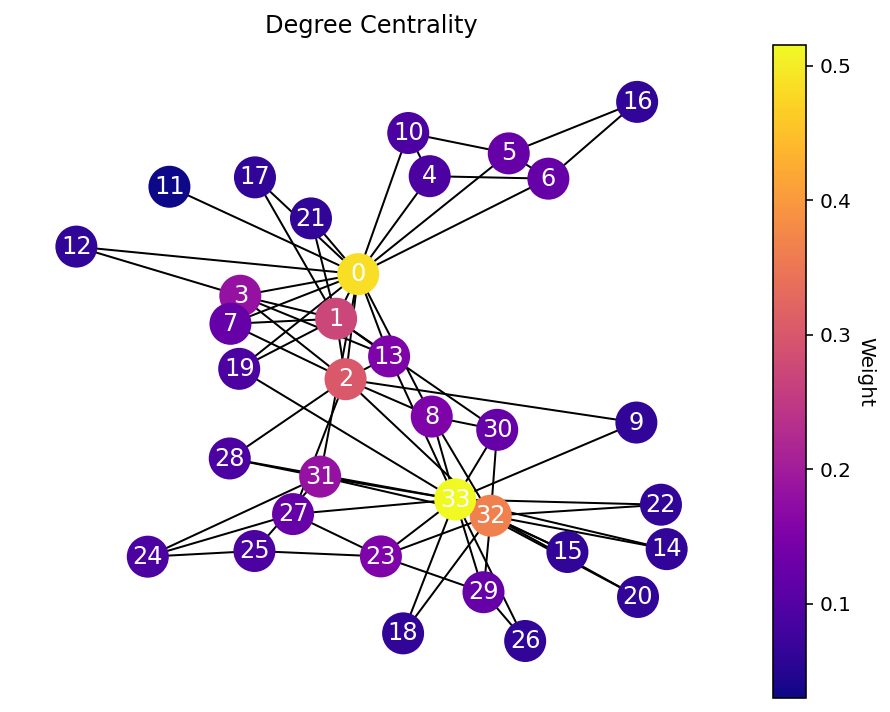

In [16]:
#Plotting the degree centrality as the color if the node using the previous function:
plt.figure(figsize=(8,6))
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality' )

Indegree centrality is a variation of degree centrality in directed graphs where only incoming edges are considered. In many contexts this is a more realistic measure of a node's importance than considering all connections. 

For example, the number of citations a scientific paper receives is probably more important than the number of papers it cites itself. 

Another example is social media; the number of followers a user has is a more accurate representation of their popularity (or 'importance') than the number of users they themselves follow.

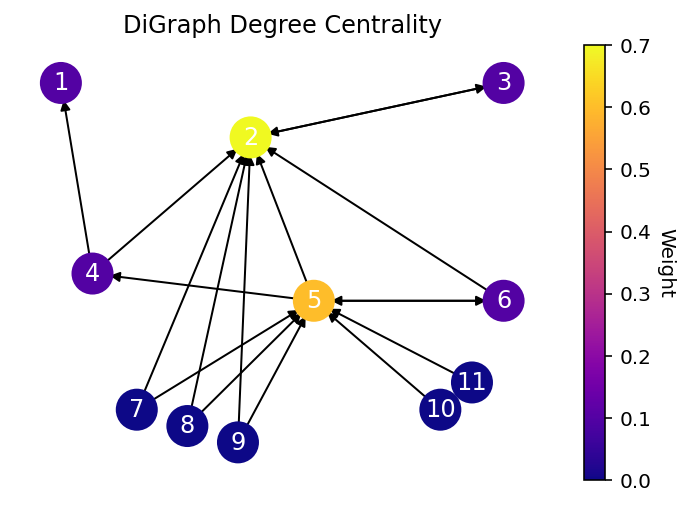

In [17]:
#Plotting the previously-defined digraph with nodes coloured based on their indegree centrality
plt.figure(figsize=(6,4))
draw(DiG, dpos, nx.in_degree_centrality(DiG), 'DiGraph Degree Centrality')

## 6. Eigenvector Centrality

The Eigenvector centrality measures the importance of a node based on the importance of its neighbors, following a recursive process that can be explained by the eigenvectors of the adjacency matrix.
For an intuitive explanation please visit: https://www.youtube.com/watch?v=1S1mD0l9FwU&ab_channel=JustinRuths



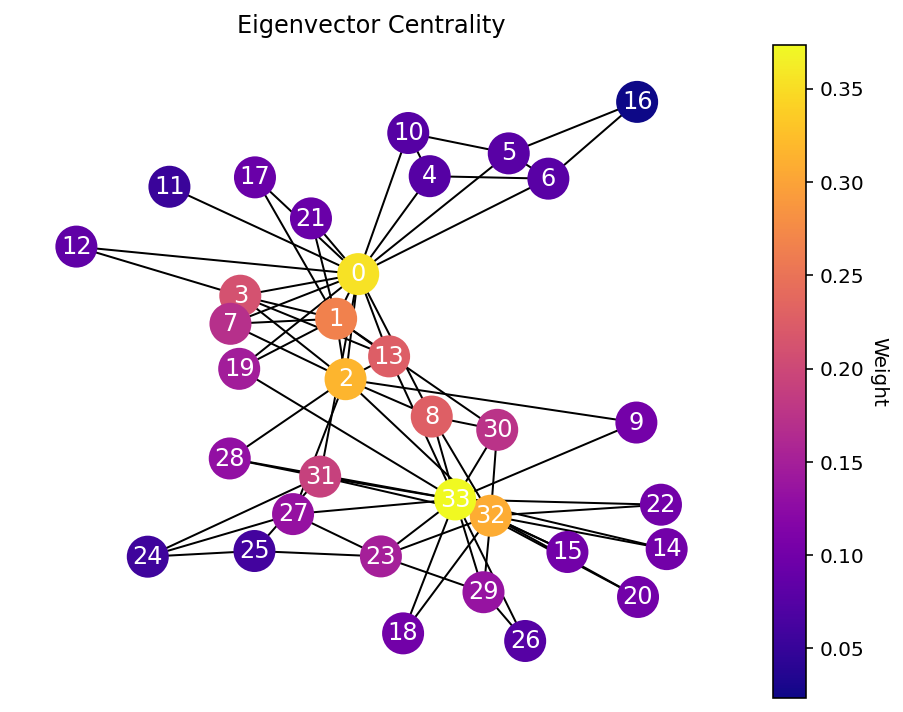

In [18]:
plt.figure(figsize=(8,6))
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

_Eigenvector centrality_ is a basic extension of _degree centrality_,
which defines centrality of a node as proportional to its neighbors' importance.
When we sum up all connections of a node, not all neighbors are equally important.
Let's consider two nodes in a friend network with same degree,
the one who is connected to more central nodes should be more central.

First, we define an initial guess for the centrality of nodes in a graph as $x_i=1$.
Now we are going to iterate for the new centrality value $x_i'$ for node $i$ as following:

$$
  x_i' = \sum_{j} A_{ij}x_j
$$

Here $ A_{ij} $ is an element of _the adjacency matrix_,
where it gives $ 1 $ or $ 0 $ for whether an edge exists between nodes $ i $ and $ j $.
it can also be written in matrix notation as $ \mathbf{x'} = \mathbf{Ax} $.
We iterate over t steps to find the vector $ \mathbf{x}(t) $ as:

$$
  \mathbf{x}(t) = \mathbf{A^t x}(0)
$$

The drawing also shows, the nodes which have the same number of connections are not necessarily in the same heat map color.
The one that is connected to more central nodes are more _hot_ in this visualization.

However, as we can see from the definition,
it is a problematic measure for directed graphs.
Let's say that a new research paper is published and it references a handful of existing papers.
It would not contribute to any of those referenced papers in this citation network
because it is not cited by any other papers and has zero _eigenvector centrality_.
In other words, _eigenvector centrality_ would not take zero _in-degree_ nodes into account
in directed graphs such as citation networks.

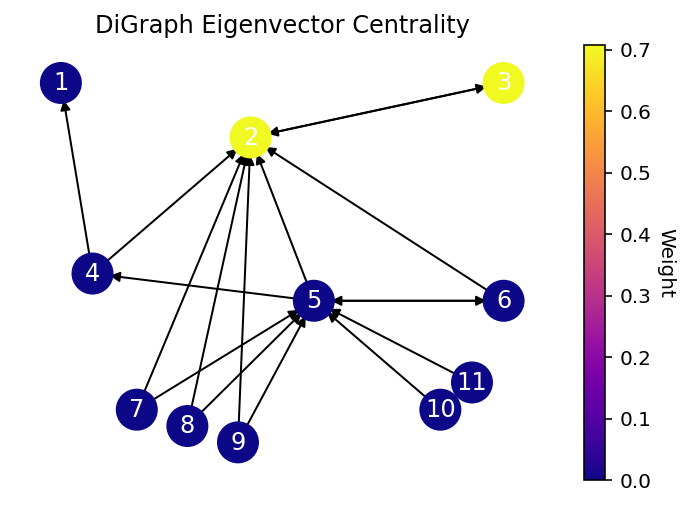

In [19]:
plt.figure(figsize=(6,4))
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

Here the contribution from zero _in-degree_ nodes is zero; consequently, all values of eigenvector centrality are zero except two nodes which are referencing each other.

## 7. Katz Centrality

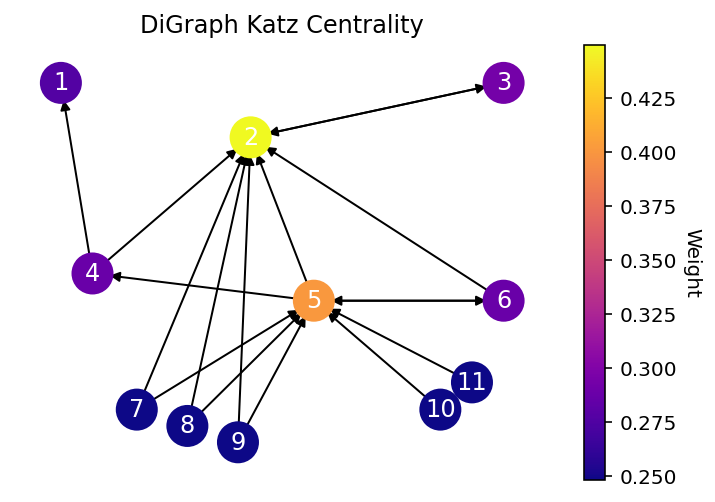

In [20]:
plt.figure(figsize=(6,4))
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

_Katz centrality_ introduces two positive constants $ \alpha $ and $ \beta $
to tackle the problem of _eigenvector centrality_ with zero in-degree nodes:

$$
    x_i = \alpha \sum_{j} A_{ij} x_j + \beta,
$$

again $ A_{ij} $ is an element of _the adjacency matrix_,
and it can also be written in matrix notation as $ \mathbf{x} = \alpha \mathbf{Ax} + \beta \mathbf{1} $.
This $ \beta $ constant gives a _free_ centrality contribution for all nodes
even though they don't get any contribution from other nodes.
The existence of a node alone would provide it some importance.
$ \alpha $ constant determines the balances between the contribution from other nodes and the _free_ constant.

Although this method is introduced as a solution for directed graphs,
it can be useful for some applications of undirected graphs as well.

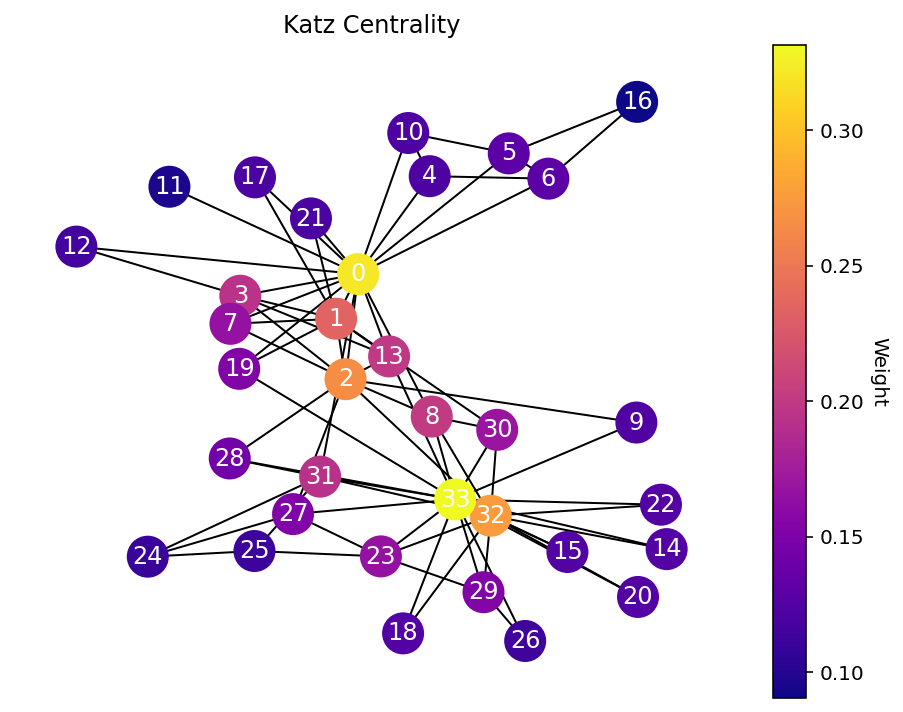

In [21]:
plt.figure(figsize=(8,6))
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')

## 8. Closeness Centrality

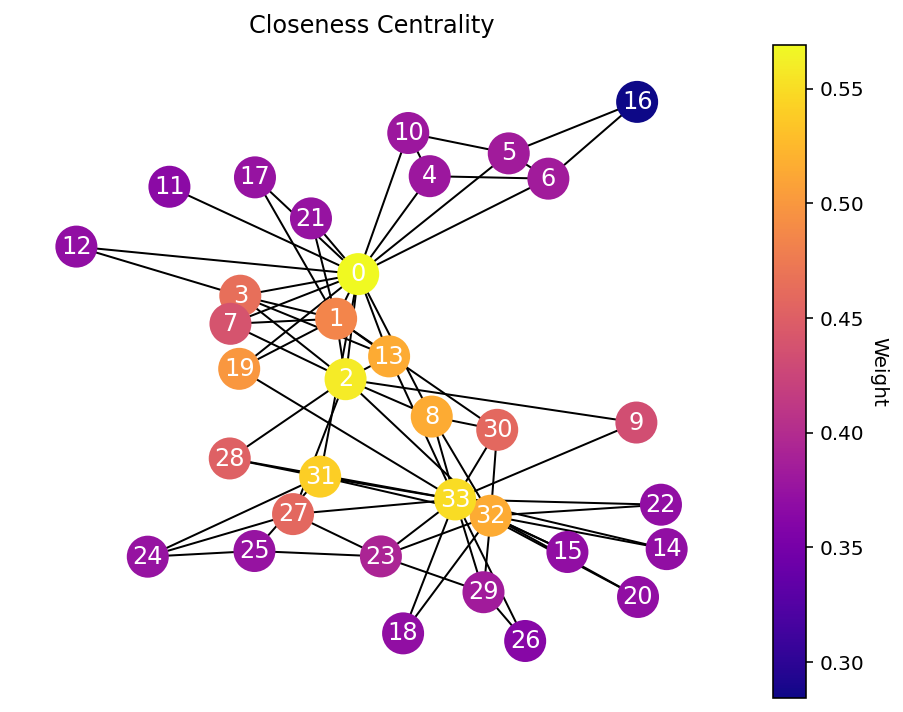

In [22]:
plt.figure(figsize=(8,6))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

 _Closeness Centrality_ is a self-explanatory measure where each node's importance is determined by closeness to all other nodes. Let $d_{ij}$ be the length of the shortest path between nodes $i$ and $j$, the average distance $l_i$ is such as:
 
$$
  l_i = \dfrac{1}{n} \sum_{j}d_{ij}
$$

Since we are looking for the closer node, the _Closeness Centrality_ $C_i$ is inverse proportional to average length $l_i$, so:

$$
  C_i = \dfrac{1}{l_i} = \dfrac{n}{\sum_{j}d_{ij}}
$$

Here we are using an _unweighted_ graph and all edges have weight $1$ distance cost for calculating shortest path length $d_{ij}$. This measure can be used to determine the central distribution point in a delivery network.

PageRank was introduced by the founders of Google to rank websites in search results.
It can be considered as an extension of _Katz centrality_.
The websites on the web can be modeled as a directed graph,
where hypermedia links between websites determines the edges.
Let's consider a popular web directory website with high _Katz centrality_ value which has millions of links to other websites.
It would contribute to every single website significantly, nevertheless not all of them are important.
To overcome that issue, contribution value is divided by _out-degree_ of the node:

$$
    x_i = \alpha \sum_{j} A_{ij} \frac{x_j}{k_j^{out}} + \beta,
$$

where $ k_j^{out} = 1 $ for zero out-degree nodes to avoid division by zero.
It can also be written in matrix terms as:

$$
    \mathbf{x} = \alpha \mathbf{A D^{-1} x} + \beta \mathbf{1},
$$

where $  \mathbf{D} $ is a diagonal matrix with elements $ D_{ii} = max(k_i^{out}, 1) $.

As the drawing demonstrates, the nodes with fewer _out-degree_ contributes way more to each node compared the _Katz Centrality_. Here the node at the top right gets only reference of a very important node, and it becomes way more important compared to the _Katz Centrality_; on the other hand, the node in the center which gets contribution from high _out-degree_ nodes loses its importance.

## 9. Betweenness Centrality

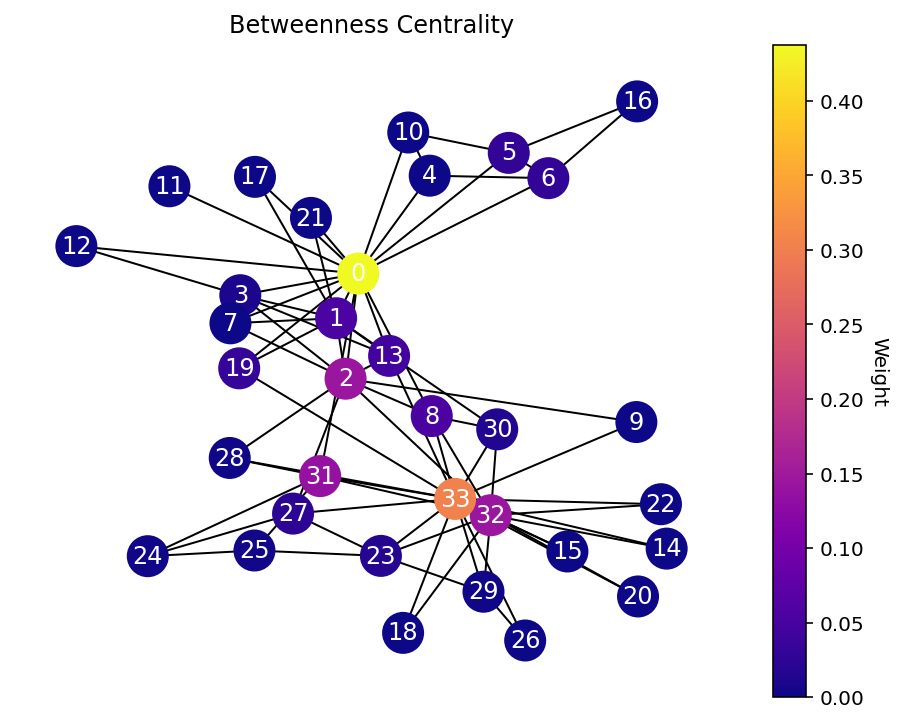

In [23]:
plt.figure(figsize=(8,6))
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

_Betweenness Centrality_ is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. For starting node $s$, destination node $t$ and the input node $i$ that holds $s \ne t \ne i$, let $n_{st}^i$ be 1 if node $i$ lies on the shortest path between $s$ and $t$; and $0$ if not. So the _betweenness centrality_ is defined as:

$$
  x_i = \sum_{st} n_{st}^i
$$

However, there can be more than one shortest path between $s$ and $t$ and that will count for centrality measure more than once. Thus, we need to divide the contribution to $g_{st}$, total number of shortest paths between $s$ and $t$.

$$
  x_i = \sum_{st} \frac{n_{st}^i}{g_{st}}
$$

**References and further reading**

* Newman, Mark. *Networks: An Introduction* (pp. 168-234, Chapter 7: Measures and Metrics)., Oxford University Press, 2010.
* Zachary, Wayne W. *An Information Flow Model for Conflict and Fission in Small Groups*., 1977.

## 10. Comparison on Centrality Metrics

We can compare two centrality metrics by plotting their values for the nodes in a given network against one another. We do so below for all pairs of centrality measures covered so far. 

The plots on the diagonal are histograms of the values of each centrality metric. 

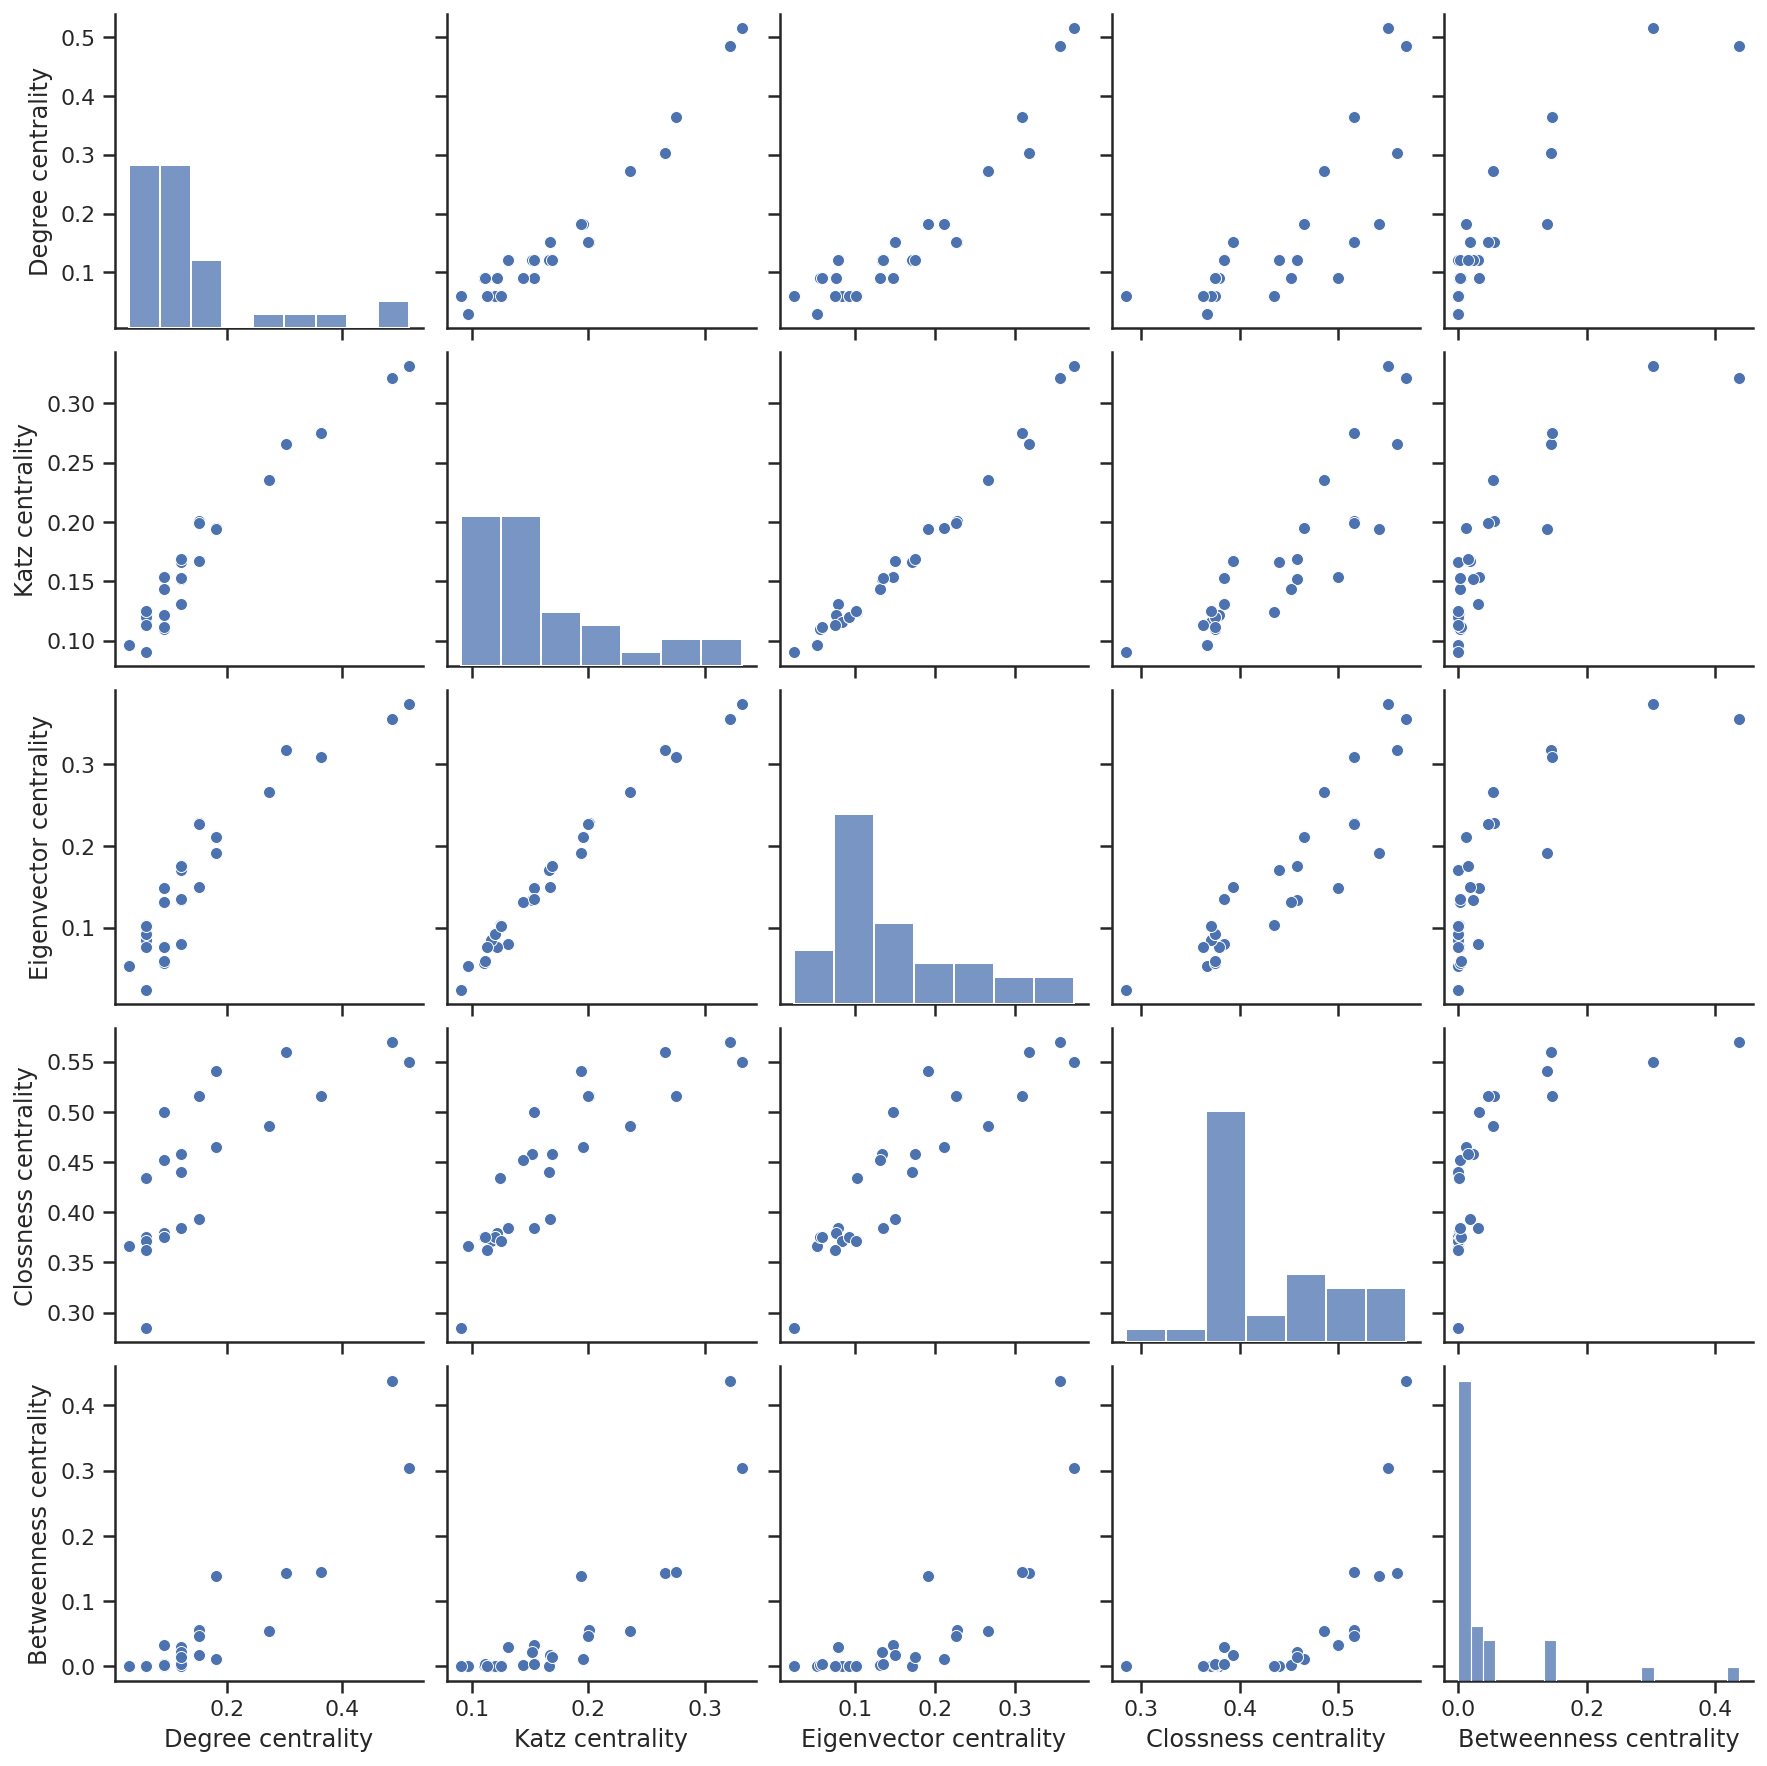

In [24]:
#Create a list with all the previous measures
# for each node, add a list of its centrality measurements to a running list
data = []
for k in nx.degree_centrality(G).keys():
    data.append([nx.degree_centrality(G)[k],
                     nx.katz_centrality(G)[k],
                     nx.eigenvector_centrality(G)[k],
                     nx.closeness_centrality(G)[k],
                     nx.betweenness_centrality(G)[k]]
                    )

#Create a dataframe with the results of the measures:
df=pd.DataFrame(data,
                columns=['Degree centrality','Katz centrality','Eigenvector centrality','Clossness centrality','Betweenness centrality'])

#Plot the dataframe variables:
sns.set(style="ticks")
sns.pairplot(df)

## 11. K-Core

_K-core_ detects the node in the core of the network which make them more central. This algorithm is iterative and it starts removing all the nodes with degree 1. The degree of the nodes are updated and then we check again if there are nodes of degree 1 and we remove them too. If there are no more nodes of degree 1 the k is increased to 2 and all the nodes with degree 2 are removed, degrees are updated, and we remove all remaining nodes with degree 2 or less. We increase the value of k until all nodes of the network are removed. The last group of nodes in being removed are those with the largest k-core and k takes the value of the last increase. **The centrality of each node is the value of the core in which the node was removed.**

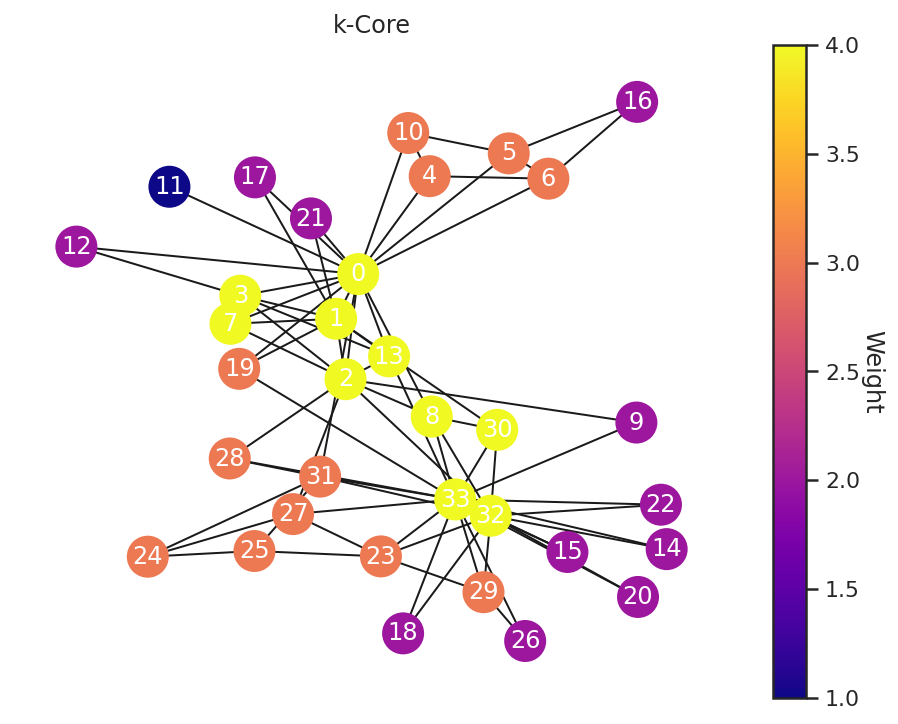

In [25]:
plt.figure(figsize=(8,6))
draw(G, pos, nx.core_number(G), 'k-Core')